# Creating a keras sequential model to interpret any single digit number.

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.metrics import confusion_matrix
import itertools

## Importing the Data

In [2]:
"""
Extracting the information frome mnist-digits-train.csv file, 
emnist-digits-test.csv and storing the contents in Xtrain, 
Ttrain (Used to train the model), and Xtest, 
Ttest (Used to test the model).

Xtrain, Xtest contains rows of an array with 784. Which represents 
an 28 by 28 pixel image and the values represent the greyscale / 255.
Xtrain contains 239 999 rows while Xtest contains 39 999 rows.

Ttrain, Ttest contains a number from 0 to 9 which corresponds 
to the handwritten digit for their repesctive row of numbers.
"""

Xtrain = pd.read_csv("Data/emnist-digits-train.csv", dtype="int16")
Xtest = pd.read_csv("Data/emnist-digits-test.csv", dtype="int16")

Ttrain = Xtrain["8"]
Ttest = Xtest["0"]

Xtrain.drop(columns=["8"], inplace=True)
Xtest.drop(columns=["0"], inplace=True)

## Creating, Compiling, Training and Testing the Model

In [3]:
"""
Uses keras to create a keras sequential model with 3 layers. 
First layer takes the input which corresponds to our data. 
The second layer is the hidden layer. The dense represents that 
this layer is fully connected to the previous layer. It also uses 
the rectify linear unit activation function. The third layer 
represents all the possible outputs which corresponds to 
the 10 possible digits in our data set. It also uses the 
softmax activation function.
"""

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,1)), 
    keras.layers.Dense(128, activation="relu"), 
    keras.layers.Dense(10, activation="softmax")
])

In [4]:
"""
Compiles the model with adam (Adaptive Moment Estimation) 
optimizer, cross entropy loss function, and we want to 
focus on accuracy.
"""

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
"""
Trains the model with the given Xtrain and Ttrain
with the batch size of 400 and epochs of 12.
"""

model.fit(Xtrain, Ttrain, batch_size=400, epochs=12, shuffle=True)

Epoch 1/12
600/600 [==============================] - 3s 5ms/step - loss: 2.4741 - accuracy: 0.9152
Epoch 2/12
600/600 [==============================] - 2s 4ms/step - loss: 0.3328 - accuracy: 0.9439
Epoch 3/12
600/600 [==============================] - 2s 4ms/step - loss: 0.1928 - accuracy: 0.9567
Epoch 4/12
600/600 [==============================] - 3s 4ms/step - loss: 0.1432 - accuracy: 0.9641
Epoch 5/12
600/600 [==============================] - 2s 4ms/step - loss: 0.1193 - accuracy: 0.9687
Epoch 6/12
600/600 [==============================] - 3s 4ms/step - loss: 0.1044 - accuracy: 0.9723
Epoch 7/12
600/600 [==============================] - 2s 4ms/step - loss: 0.0962 - accuracy: 0.9743
Epoch 8/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0886 - accuracy: 0.9760
Epoch 9/12
600/600 [==============================] - 3s 5ms/step - loss: 0.0862 - accuracy: 0.9766
Epoch 10/12
600/600 [==============================] - 3s 5ms/step - loss: 0.0819 - accuracy: 0.9774

In [6]:
test_loss, test_acc = model.evaluate(Xtest, Ttest, verbose=1) 

print('Test accuracy:', test_acc)

1250/1250 [==============================] - 2s 1ms/step - loss: 0.1054 - accuracy: 0.9741
Test accuracy: 0.974099338054657


## User Input with Test Data
### The user can input any number from 0 to 39 998 (Inclusive) and the function will output the image of the number, the correct number that is being represented, and the model's predicted results

In [7]:
def test_data(image_num):
    """
    Takes an input from 0, 39 998 and uses the validation data 
    from the data set and will print the image, actual number 
    and the predicted number by the model.
    """
    image = np.array(Xtest.loc[image_num])
    
    # Predicts the model 
    prediction = model.predict(image.reshape(1, 784))

    image = image.reshape((28, 28))

    plt.imshow(image.T)
    plt.show()

    print("Actual Result: " + str(Ttest.loc[image_num]))

    predicted_num = np.argmax(prediction[0])
    print("Model Predicted Number: " + str(predicted_num))

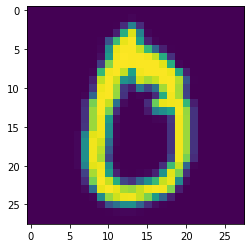

Actual Result: 0
Model Predicted Number: 0


In [8]:
test_data(20000)
# Input any value between 0 and 39 998 inclusive

## User Input with a Created Image
### The user can alter the number.png and the model will attempt to accurately decipher the written number.

In [9]:
def read_written_num(filename):
    """
    Given any image it will attempt to guess the written number.
    """
    img = Image.open(filename)
    img = img.resize((28, 28))
    # Converts the image to a greyscall image
    img = np.asarray(img)
    if len(img.shape) == 3:
        img = np.dot(img[:28, :28, :3], [0.2989, 0.5870, 0.1140])
    img = 255 - img
    
    # Displays the image
    plt.imshow(img)
    plt.show()
    
    # Reshapes the image to the correct shape to use in the model
    img = img.T
    img = img.reshape((1, 784))
    
    predictions = model.predict([img])
    predicted_num = np.argmax(predictions[0])
    print("Model Predicted Number: " + str(predicted_num))

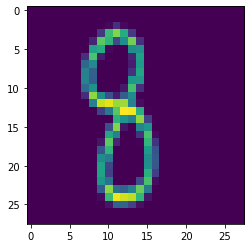

Model Predicted Number: 8


In [10]:
read_written_num("number.png")
# Attempts to read the number written in number.png file

## Confusion Matrix
### Creates a chart that will show the comparison between the model's predicted results and the correct results.

In [11]:
predictions_percentages = model.predict(Xtest)
predictions = np.argmax(predictions_percentages, axis=-1)

cm = confusion_matrix(y_true=Ttest, y_pred=predictions)

In [12]:
"""
This function is directly copied from scikit-learn's website. 
(https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)
"""

def plot_confusion_matrix(cm, 
                          classes, 
                          normalize=False, 
                          title="Confusion Matrix", 
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

Confusion matrix, without normalization


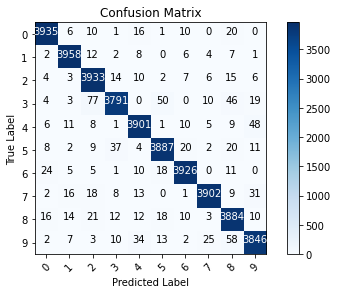

In [13]:
cm_plot_labels = list("0123456789")
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)